<a href="https://colab.research.google.com/github/DSanchezVargas/MachineLearningCourse/blob/master/Linear_regression_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2 - Regresión Lineal

*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

In [ ]:
# Importamos la librería SKLearn, que trae bastantes funcionalidades de Machine
# Learning. Esta librería también incluye algunos datasets muy conocidos como por
# ejemplo el que vamos a utilizar hoy: El Boston Housing Dataset.
import sklearn as skl

# Importamos la función que nos carga los datos. OJO! Esta forma de cargar los
# datos no es habitual. Lo hacemos así porque la librería nos proporciona este
# dataset, que suele ser utilizado comunmente para pruebas. Sin embargo, lo
# habitual sería cargar este dataset nosotros mismos.
from sklearn.datasets import load_boston

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [ ]:
# Los datos cargados desde la librería Sklearn contienen una descripción del
# dataset que estamos cargando, almacenado en el atributo DESCR.

boston_dataset = load_boston()

print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

# Guardamos información de las dimensiones de nuestro dataset. Recuerda:
# n = número de ejemplos que tenemos de nuestros datos y
# p = número de características que tenemos de cada datos.

n, p = X.shape
n, p
rm = X[:, 5]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1. Análisis exploratorio inicial.

Hoy nos centraremos en modelar la relación existente entre las variables **RM** (Número medio de habitaciones) y **MEDV** (Valor medio de la vivienda). Como debe de ser ya costumbre, vamos a primero comenzar entendiendo la naturaleza de nuestros datos, realizando un análisis exploratorio preliminar. Recuerda, aquí hacemos uso de las herramientas estadísticas y matemáticas aprendidas para obtener una mejor imagen de lo que nuestros datos representan. La pregunta aquí es... ¿Qué preguntas quieres responder con estas herramientas?

---

**Tu tarea:**  Realiza un análisis exploratorio en el que respondas las siguientes pregunas:


1.  **¿Existe algún relación entre la variable RM y MEDV?** Demuestra la existencia de dicha relación desde dos vertientes diferentes: grafica un *scatter plot* con cada variable en un eje que te permita visualizar algún patrón identificable. También, utiliza una medida estadística como la correlación entre dos variables (¿Que cómo se hace? Google te lo cuenta) para comprobar cuantitativamente dicha relación. ¿Son coherentes ambos análisis?¿Es coherente con lo que se puede esperar de manera intuitiva?

2.   **¿Cúal es el precio medio de las viviendas cuyo número medio de habitaciones oscila entre 5 y 6?** Aquí te puedes apoyar en la función ***np.logical_and()*** si necesitas combinar dos condiciones diferentes.

3. **¿Identificas algún fenómeno anómalo en la distribución de los datos?** Realiza un histograma para la variable MEDV. Aquí recomiendo utilizar un valor elevado de *bins*, por encima de 100, para remarcar el efecto de la anomalía. ¿De qué se trata?¿Crees que se trata de mediciones reales o es fruto de un preprocesamiento previo de los datos?

**Consejo:** cuando al hacer un *scatter plot* haya una gran acumulación de puntos en una zona de la gráfica que no te permita identificar la densidad de puntos que hay, es una buena idea añadir algo de transparencia al color de dichos puntos. Esto se consigue con el atributo ***alpha*** de la función*** plot()***

In [ ]:
# COMIENZA TU CÓDIGO AQUÍ #
def relation_rm_medv(rm, means):
  plt.scatter(rm, means, alpha=0.25)
  plt.title("RM contra MEDV")
  plt.show()
  return np.corrcoef(rm, means)[0, 1]

def price_mean(rm, means):
  filtered_means = means[np.logical_and(rm > 5, rm < 6)]
  return np.mean(filtered_means) * 1000

def medv_hist(medv):
  plt.hist(medv, bins=500)
  plt.show()



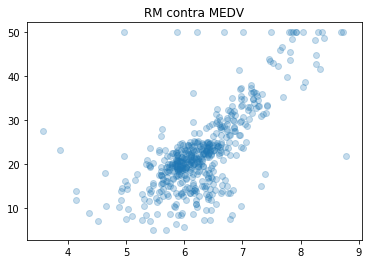

La correlación de RM y MEDV es: 0.6953599470715393
La media de las viviendas con un número de viviendas entre 5 y 6 es: 17551.5923566879


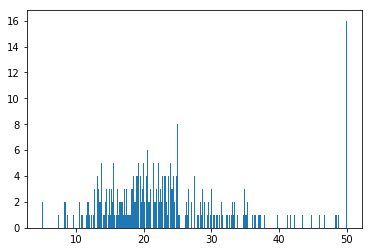

In [ ]:
print("La correlación de RM y MEDV es:", relation_rm_medv(rm, Y))
print("La media de las viviendas con un número de viviendas entre 5 y 6 es:", price_mean(rm, Y))
medv_hist(Y)

## 2. Regresión Lineal Simple - Mínimos Cuadrados Ordinarios.

Una vez hemos efectuado el análisis exploratorio inicial, vamos a proceder a implementar y entrenar a nuestro modelo. Recuerda que podemos conseguir ajustar a los datos nuestra recta de regresión lineal haciendo uso de aquellos valores de los parámetros obtenidos mediante el método de ***Mínimos Cuadrados Ordinarios***. Este método encuentra que el mínimo de la función del ***Error Cuadrático Medio*** se encuentra en el punto donde su derivada es igual a 0. Esto se obtiene evaluando la siguiente expresión:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

Recuerda que para trabajar de forma vectorizada, ampliamos la matriz $X$ con una primera columna de valores asignados a $1$, que servirán para mantener al termino independiente pues... pues eso: independiente.

---

**Tu tarea:**

1.   Ajusta el modelo de Regresión Lineal mediante el método de ***Mínimos Cuadrados Ordinarios***.
2.   Una vez hayas calculado los parámetros, visualiza la recta obtenida para comprobar que realmente se ajusta a la nube de puntos.
3.   Explica cómo interpretas intuitivamente los valores de cada uno de los parámetros. ¿Qué representa $w_0$?¿Y $w_1$?
4.   Utiliza el modelo entrenado para predecir cuál será el valor medio de la vivienda para un número medio de ***9 habitaciones***, y también el número de habitaciones medio que podría tener una vivienda cuyo valor medio es de **45.000\$**.
5.   Utiliza el modelo entrenado para calcular, para cada valor de $X$, cual es el valor predicho por la regresión. Llamaremos al vector generado el vector de salida predicho $Y_P$. Ahora, vamos a evaluar la calidad de las predicciones implementando una función a la que le pases como parámetros el vector de valores de salida reáles $Y$ y el vector de salida predicho $Y_P$, y computa el ***Error Cuadrático Medio***. Recuerda que  el ***ECM*** se calcula como:

> > > > >  > > >  $ \operatorname{ECM}=\frac{1}{n}\sum_{i=1}^n(Y_{Pi} - Y_i)^2. $

**Hint:** Puedes utilizar la @ como un operador equivalente a la función **np.matmul()**, utilizada para la multiplicación matricial. ej : A = B @ C

**Consejo:** Al trabajar con multiplicación de matrices y vectores, comprueba que los vectores tengan bien definidas sus dos dimensiones. Esto se puede ver usando con el atributo *X.shape* de dicho vector. Queremos que sus dimensiones se muestren así **(5, 1)** y no así **(5,)**.
Esto se puede producir por ejemplo cuando seleccionamos una única columna de una matriz. En estos casos se puede evitar seleccionando dicha columna así **X[:, 3:4]** en vez de así **X[:, 3]**. Igualmente, en caso de haber perdido una de las dimensiones, las funciones **np.newaxis()** o **reshape()** te pueden ser de ayuda.

```
ej: Y = Y[:, np.newaxis]
```
**Info:** En el punto 5 hemos calculado el error del modelo utilizando todos los datos. Más adelante en el curso veremos que esto no es del todo correcto a la hora de evaluar un modelo, pero de momento nos es suficiente.


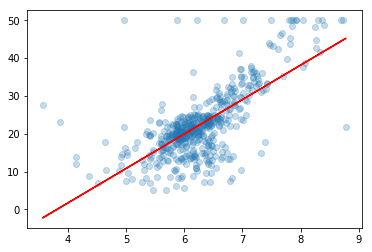

[-34.67062078   9.10210898]
47248.36005418345
8.752984713890786
43.60055177116956


In [ ]:
# COMIENZA TU CÓDIGO AQUÍ
def lineal_regression(x, means):
#   W = (Xt*X)^-1 * Xt*Y
  w = np.linalg.inv(x.T @ x) @ x.T @ Y
  plt.scatter(rm, means, alpha=0.25)
  plt.plot(rm, x @ w, color="red")
  plt.show()
  return w, x @ w

def predict_from_room_number(room_number, w):
  return (w[0] + w[1] * room_number) * 1000

def predict_from_price(price, w):
  return (price/1000 - w[0]) / w[1]

def get_mse(yp, y):
  return np.mean(np.square(np.subtract(yp, y)))


w, yp = lineal_regression(np.c_[np.ones(rm.shape[0]), rm], Y)
print(w)
print(predict_from_room_number(9, w))
print(predict_from_price(45000, w))
print(get_mse(yp, Y))



## 3. Regresión Lineal Simple - Librería Sklearn.

*[Realizar primero el ejercicio número #2]*

Hasta este punto hemos aprendido a nivel teórico y práctico cómo funciona el modelo de ***Regresión Lineal Simple*** y cómo se implementa internamente. Esto está muy bien para tener un mejor conocimiento de la materia. Sin embargo, en el día a día tenemos que ser efectivos, y para eso lo habitual será utilizar librerías que ya implementen los modelos que vamos conociendo. Por ejemplo, la librería ***Sklearn*** ya implementa muchos de los modelos de Machine Learning que vamos a aprender durante el curso, como por ejemplo, el modelo de Regresión Lineal.

---
** Tu tarea: ** Haz uso de la función ***sklearn.linear_model.LinearRegression()*** para entrenar un modelo de Regresión Lineal Simple con las mismas variables que hemos utilizado en el ejercicio anterior. Utiliza la documentación (online o usando el comando "?") para estudiar los diferentes parámetros que acepta este modelo.

Por ejemplo ¿Para qué sirve el parámetro*** fit_intercept***? Puedes entrenar el modelo con y sin dicho parámetro y visualizarlo en una gráfica.

Una vez hayas ajustado el modelo, comprueba que el valor de los parámetros obtenidos (también llamados coeficientes) sea el mismo que has obtenido anteriormente. De la misma forma, utiliza la función ***.predict()***, que ya viene implementada, para comprobar que tus predicciones eran correctas.

Finalmente, comprueba que el valor del Error Cuadrático Medio que has obtenido previamente en el ejercicio anterior es igual al que te proporciona la función ya implementada ***sklearn.metrics.mean_squared_error()***.

Como puedes ver... ¡Estas librerías ya te vienen con todo el trabajo hecho!


In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# COMIENZA TU CÓDIGO AQUÍ #

def use_sklearn():
  model = linear_model.LinearRegression().fit(rm.reshape(-1, 1), Y)
  model_2 = linear_model.LinearRegression(fit_intercept=False).fit(rm.reshape(-1, 1), Y)

  yp = model.predict(rm.reshape(-1, 1))
  yp2 =  model_2.predict(rm.reshape(-1, 1))

  plt.plot(rm, yp, color="green")
  plt.plot(rm, yp2, color="red")
  plt.scatter(rm, Y, alpha=0.25)
  plt.show()

  fit_intercept_error = mean_squared_error(Y, yp)

  print("Modelo con fit_intercept: w1 =", model.coef_[0], "w0 =",
        model.intercept_, "mse =", fit_intercept_error)
  print("Modelo sin fit_intercept: w1 =", model_2.coef_[0], "w0 =",
        model_2.intercept_, "mse =", mean_squared_error(Y, yp2))

use_sklearn()


NameError: name 'LinearRegression' is not defined

## 4. Regresión Lineal Múltiple.

Por último, como ya hemos visto, podemos generalizar el modelo de Regresión Lineal Simple añadiendo más variables y obteniendo así el model de Regresión Lineal Múltiple. Al añadir más variables al modelo, le estamos dotando de más información que ayude a mejorar las predicciones. Por ejemplo, un modelo de Regresión Lineal Simple podría intentar predecir la altura de una persona en base al tamaño de la mano. Pero si añadieramos otra variable, como por ejemplo, el género, podríamos tener más información para hacer predicciones más fidedignas.

La buena noticia es que a nivel de código, no hay gran diferencia entre ambos modelos, que también pueden ser resueltos mediante el método de ***Mínimos Cuadrados Ordinarios*** evaluando la expresión que ya conocemos:

> > > > >  > > > $W = (X^TX)^{-1}X^TY$

---
** Tu tarea: **

1. Realiza un modelo de Regresión Lineal Múltiple dónde se utilizen las variables ** RM** (Número medio de habitaciones), **LSTAT ** (Porcentaje de población en el barrio clasificada como clase baja) y **PTRATIO** (Ratio de alumno-profesor del barrio).

2. Observa el valor de los coeficientes e interprétalos.

3. Utiliza el modelo de Regresión Lineal implementado por la librería **Sklearn** para entrenar este mismo modelo y comprobar que los coeficientes que has obtenidos son correctos.

4. Evalua el modelo utilizando la función  ***sklearn.metrics.mean_squared_error()***.  y compara el valor del error obtenido en el ejercicio 2 con el Modelo de Regresión Lineal Simple. ¿El error es mayor o menor? ¿Por qué ocurre esto?


**Hint**  Puedes reutilizar mucho del código de los ejercicios anteriores.

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# COMIENZA TU CÓDIGO AQUÍ #

def user_weights(x):
  return np.linalg.inv(x.T @ x) @ x.T @ Y

x = np.c_[np.ones(rm.shape[0]), rm, X[:, [-1, -3]]]
w = user_weights(x)
print('Coeficientes "a mano":', w) # El primero es el valor resultante cuando el resto de variables son 0, el resto es la importancia (peso) de cada variable.

# Quitamos la columna de unos

x = x[:, 1:]
model = linear_model.LinearRegression().fit(x, Y)
print("Coeficientes sklearn:", model.intercept_, model.coef_)

print("Error RLM:", mean_squared_error(Y, model.predict(x)))
print("Error RLS:", get_mse(yp, Y))



Coeficientes "a mano": [18.56711151  4.51542094 -0.57180569 -0.93072256]
Coeficientes sklearn: 18.567111505395246 [ 4.51542094 -0.57180569 -0.93072256]
Error RLM: 27.13040575849706
Error RLS: 43.60055177116956
